In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
#some config
# plt.rcParams['figure.figsize']=(10,8)
# plt.rcParams['figure.dpi']=100
# plt.rcParams['font.size']=12
# plt.rcParams['legend.title_fontsize']='medium'
# plt.rcParams['legend.fontsize']='large'

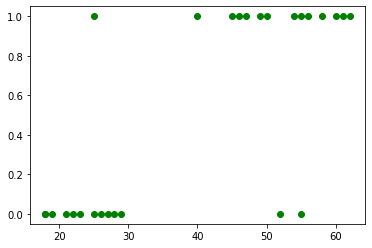

In [23]:
#Load data
df=pd.read_csv("./data/Insurance.csv")
plt.scatter(df.age,df[['bought_insurance']], color='g',marker='o')

In [24]:

#split train/test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [25]:
#create model and fit it
from sklearn.linear_model import LogisticRegression
# model=LogisticRegression().fit(x_train,y_train)
model=LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x_train,y_train)
#random_state: chạy random để tìm ra mô hình tối ưu với tập train/test

In [27]:
#get result and evaluate model
intercept=model.intercept_
coefs=model.coef_
R_q=model.score(x_train,y_train)
print(R_q)
prob_matrix=model.predict_proba(x_train)

0.875


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred=model.predict(x_train)
print(classification_report(y_train,y_train_pred))
cm=confusion_matrix(y_train, y_train_pred)
print(cm)
#precision: giai quyet bai toan phan lop,
#recall: xet do phu
#91% du bao dung trong trường hợp k mua bao hiem
#85% du bao đúng trong trường hợp mua bao hiem
#do an thi trinh bay them recall va f1-score
#cm: thể hiện các chỉ số dự đoán đúng...
#khác nhau giữa prec và acc

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.85      0.92      0.88        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24

[[10  2]
 [ 1 11]]


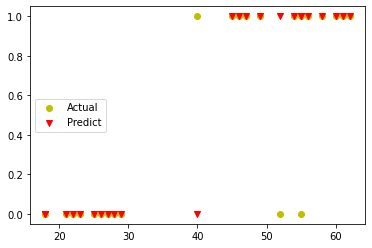

In [9]:
plt.scatter(x_train,y_train, color='y',marker='o',label='Actual')
plt.scatter(x_train,y_train_pred,color='r', marker='v', label="Predict")
plt.legend(loc='center left')
#Từ đây đến sau chỉ trực quan để làm rõ kết quả
#màu vàng dữ liệu gốc, một bên phân loại đúng, 1 bên phân loại sai, tìm hiểu thêm cái này

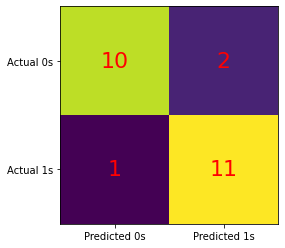

In [10]:
fig, ax=plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='r',fontsize=22)
plt.show()
#

In [11]:
#making predictions
y_pred=model.predict(x_test)
pred_score=model.score(x_test, y_test)
pred_prob_matrix=model.predict_proba(x_test)
pred_prob_matrix

array([[0.23480791, 0.76519209],
       [0.85608674, 0.14391326],
       [0.92376561, 0.07623439]])

In [14]:
# Define predicted function via Sigmoid
from comn_func import sigmoid


def prediction_function(age, inter, coef):
    z = inter + coef * age
    return sigmoid(z)


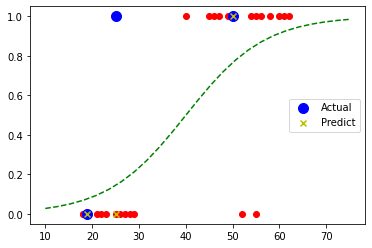

In [15]:
# Draw sigmoid plot
plt.scatter(x_train, y_train, color='r', marker='o')
# plt.scatter(df['age'], df['bought_insurance'], color ='r',marker='o')
X_test = np.linspace(10, 75, 25)
sigs = []
for item in X_test:
    sigs.append(prediction_function(item, intercept[0], coefs[0][0]))
plt.plot(X_test, sigs, color='g', linestyle='--')
plt.scatter(x_test, y_test, color='b', s=100, label='Actual')
plt.scatter(x_test, y_pred, color='y', marker='x', label='Predict')
plt.legend(loc="center right")
plt.show()